In [1]:
# ! wget ftp://ftp.monash.edu/pub/nihongo/radkfile.gz

In [2]:
# ! wget ftp://ftp.monash.edu/pub/nihongo/kradfile.gz

In [3]:
import gzip
with gzip.GzipFile('kradfile.gz') as fin:
    krad = fin.read().decode('euc-jp')

In [4]:
# The krad file describes the radicals present in each Kanji
print('\n'.join(krad.split('\n')[100:120]))

唖 : ｜ 一 口
娃 : 女 土
阿 : 一 口 亅 阡
哀 : 衣 口 亠
愛 : 心 爪 冖 夂
挨 : 矢 厶 扎 乞
姶 : 一 口 女 个
逢 : ｜ 込 二 夂
葵 : 人 大 二 癶 艾 ノ
茜 : 西 艾
穐 : 禾 亀 乙 勹 田
悪 : ｜ 一 口 心
握 : 至 土 厶 尸 扎
渥 : 至 汁 土 厶 尸
旭 : 日 九
葦 : 口 艾 韋
芦 : 戸 艾 一 尸
鯵 : 魚 大 田 厶 彡 杰
梓 : 十 辛 木 立
圧 : 土 厂


In [5]:
def parse_krad():
    for line in krad.split('\n'):
        if line and line[0] == "#":
            continue
        elif ' : ' in line:
            kanji, radicals = line.split(' : ')
            radicals = radicals.split(' ')
            yield kanji, radicals
        
krad_dict = dict(parse_krad())

In [6]:
krad_dict['悪']

['｜', '一', '口', '心']

In [7]:
# What are the most common radicals?
import collections
radicals = collections.Counter()
for val in krad_dict.values():
    radicals.update(val)

radicals.most_common(10)

[('口', 1340),
 ('一', 991),
 ('｜', 646),
 ('ノ', 626),
 ('木', 601),
 ('日', 593),
 ('ハ', 542),
 ('二', 476),
 ('土', 463),
 ('田', 461)]

In [8]:
# Are there any circular definitions?
circular = [key for (key, value) in krad_dict.items() if key in value]
print(''.join(circular))

衣井一羽雨臼瓜奄王黄岡乙音化火禾牙貝角革刈瓦干甘缶鬼亀黍久及弓牛巨魚巾斤金九欠穴血月犬見元玄言戸鼓五乞口工行香高黒骨込艮冊皿山士子支止氏糸至歯示而耳自鹿車手首舟十汁初女小尚色食心臣身辛人水寸世生西青斉石赤舌川舛鼠走足大辰谷竹虫長鳥爪鼎滴田斗土刀豆酉屯二肉日入乃巴馬買白麦犯釆比皮非飛鼻疋品父風文米頁片母方邦亡忙卜麻又無矛免面毛木目勿尤門也矢夕用羊里立竜力礼老个丶亅亠儿冂冖冫几凵勹匕匚卩厂厶囗夂宀尢尸屮巛已并幺广廴廾弋彑彡彳戈扎攵无曰杰歹殳毋气爻爿疔癶禹耒聿艾虍豕豸阡隶隹韋韭髟鬥鬯鬲鹵黹黽齊龠


In [9]:
# Can we measure similarity between Kanji?
def count_similar_radicals(kanji1, kanji2):
    rad1 = set(krad_dict[kanji1])
    rad2 = set(krad_dict[kanji2])
    return len(rad1.intersection(rad2))


def count_different_radicals(kanji1, kanji2):
    rad1 = set(krad_dict[kanji1])
    rad2 = set(krad_dict[kanji2])
    diff = rad1.symmetric_difference(rad2)
    print(diff)
    return len(diff)


count_different_radicals('漢', '難')

{'隹', '亠', '汁', '一'}


4

In [10]:
def get_similar_kanji(kanji, threshold=1):
    sim = sorted(((count_similar_radicals(kanji, k), k) for k in krad_dict),
                 reverse=True)
    return [k for (s, k) in sim if s > threshold]

get_similar_kanji('難', 3)

['難', '灘', '漢', '歎', '嘆', '喫', '儺']

In [11]:
# ! wget http://ziggr.com/heisig/heisig-data.txt.gz

In [12]:
# The Heisig method assigns keywords to Kanji, and groups Kanji into lessons of increasing difficulty.
import io
import csv

def tweak(kanji):
    for key, value in kanji.items():
        if value.isdigit():
            kanji[key] = int(value)
    return dict(kanji)

with gzip.GzipFile('heisig-data.txt.gz') as fin:
    fin.readline()
    reader = csv.DictReader(io.StringIO(fin.read().decode('utf-8')), delimiter=':')
    heisig = [tweak(x) for x in reader]
    
heisig_dict = {k['kanji']: k for k in heisig}

print(heisig[:3])

[{'#heisignumber': 1, 'kanji': '一', 'keyword3rd-ed': 'one', 'keyword4th-ed': 'one', 'keyword5th-ed': 'one', 'strokecount': 1, 'indexordinal': 1, 'lessonnumber': 1}, {'#heisignumber': 71, 'kanji': '乙', 'keyword3rd-ed': 'fish guts', 'keyword4th-ed': 'fish guts', 'keyword5th-ed': 'fish guts', 'strokecount': 1, 'indexordinal': 2, 'lessonnumber': 5}, {'#heisignumber': 686, 'kanji': '乃', 'keyword3rd-ed': 'from', 'keyword4th-ed': 'from', 'keyword5th-ed': 'from', 'strokecount': 2, 'indexordinal': 3, 'lessonnumber': 23}]


In [13]:
heisig_dict['止']

{'#heisignumber': 370,
 'indexordinal': 105,
 'kanji': '止',
 'keyword3rd-ed': 'stop',
 'keyword4th-ed': 'stop',
 'keyword5th-ed': 'stop',
 'lessonnumber': 17,
 'strokecount': 4}

In [14]:
lesson18 = [k for k in heisig if k['lessonnumber'] == 17]
lesson18[:3]
len(lesson18)

26

In [15]:
def common_radicals(k1, k2):
    """Return the number of common radicals between the two Kanji."""
    rad1 = set(krad_dict[k1])
    rad2 = set(krad_dict[k2])
    return len(rad1.intersection(rad2))


def parent_child(k1, k2):
    """Return 1 if k1 is a parent of k2, or the other way around.
    
    A parent Kanji contains all the radicals of a child Kanji, plus more."""
    rad1 = set(krad_dict[k1])
    rad2 = set(krad_dict[k2])
    common = rad1.intersection(rad2)
    return 1 if (common == rad1 or common == rad2) else 0

parent_child('月', '朝')

1

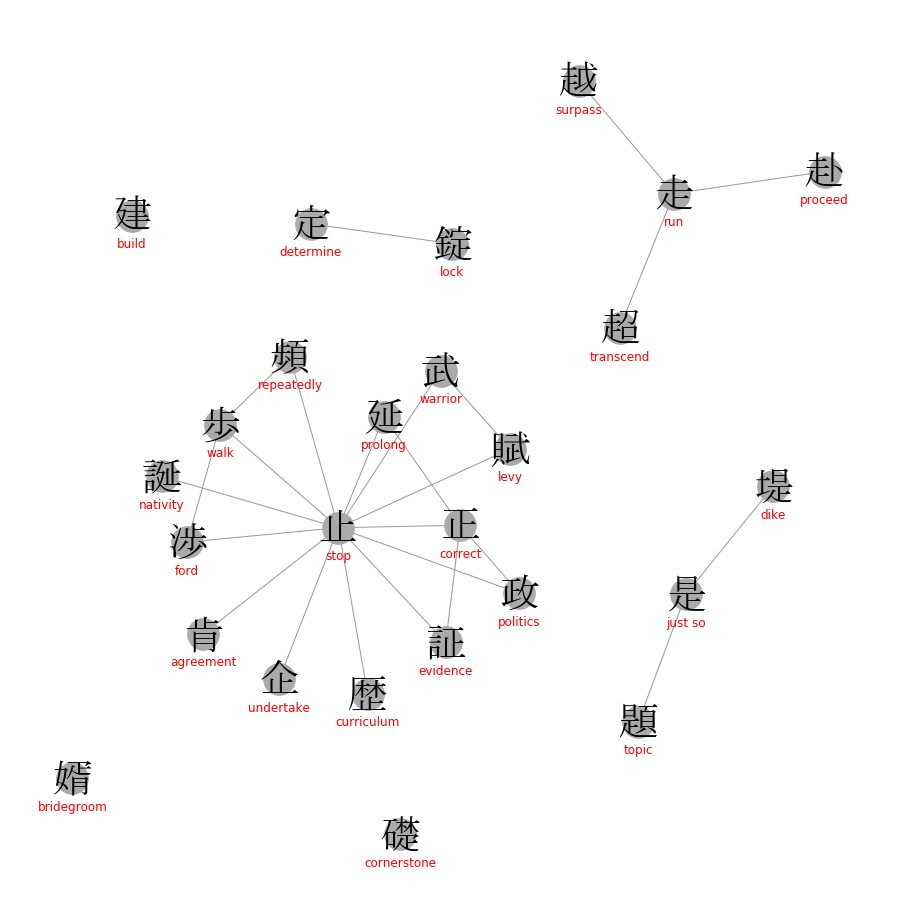

In [63]:
# http://manualthinking.com/scholar-use/visual-ma-of-kanji/
# http://manualthinking.com/wp-content/uploads/2012/05/kanji.jpg

import itertools

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib.pyplot as plt


def construct_graph(kanji_list, edge_function=common_radicals, edge_threshold=0):
    """Construct a graph that covers the specified Kanji."""
    G = nx.Graph()
    for k in kanji_list:
        G.add_node(k['kanji'], keyword=k['keyword4th-ed'])

    for k1, k2 in itertools.combinations(kanji_list, 2):
        kanji1, kanji2 = k1['kanji'], k2['kanji']
        weight = edge_function(kanji1, kanji2)
        if weight:
            G.add_edge(kanji1, kanji2)
    return G

G = construct_graph(lesson18, edge_function=parent_child)

positions = graphviz_layout(G, 'neato')
plt.figure(figsize=(12, 12))

nx.draw(G, pos=positions, with_labels=False, font_weight='bold',
        node_color='#aaaaaa', node_size=1000, edge_color='#999999')

# https://qiita.com/grachro/items/4c9b03366cae2df3a301
# fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# [f for f in fonts if 'mincho' in f.lower()]

keywords = {k['kanji']: k['keyword3rd-ed'] for k in lesson18}
keyword_positions = {k: (x, y - 15) for (k, (x, y)) in positions.items()}
nx.draw_networkx_labels(G, positions, font_family='MS Mincho', font_size=40)
nx.draw_networkx_labels(G, keyword_positions, labels=keywords, font_size=12, font_color='red')
plt.show()

In [64]:
# Look at the connected components of the above graph one by one
largest_cc = sorted(nx.connected_components(G), key=len, reverse=True)[0]
''.join(largest_cc)

'頻延歴歩止誕企武政肯正賦渉証'

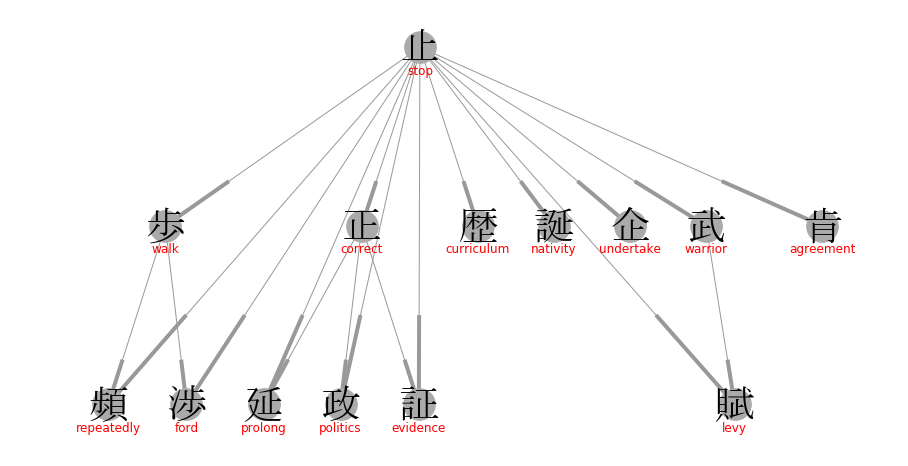

In [65]:
import random

def includes(k1, k2):
    """Return 1 if k1 is a parent of k2.
    
    A parent Kanji contains all the radicals of a child Kanji, plus more."""
    rad1 = set(krad_dict[k1])
    rad2 = set(krad_dict[k2])
    common = rad1.intersection(rad2)
    return 1 if (common == rad1) else 0


kanji_list = [heisig_dict[k] for k in largest_cc]
D = nx.DiGraph()
for k1, k2 in itertools.permutations(kanji_list, 2):
    kanji1 = k1['kanji']
    kanji2 = k2['kanji']
    if includes(kanji1, kanji2):
        D.add_edge(kanji1, kanji2)

positions = graphviz_layout(D, 'dot')
plt.figure(figsize=(12, 6))
nx.draw(D, pos=positions, with_labels=False, font_weight='bold',
        node_color='#aaaaaa', node_size=1000, edge_color='#999999')
keywords = {k['kanji']: k['keyword3rd-ed'] for k in kanji_list}
keyword_positions = {k: (x, y - 10)
                     for (k, (x, y)) in positions.items()}
nx.draw_networkx_labels(D, positions, font_family='MS Mincho', font_size=40)
nx.draw_networkx_labels(D, keyword_positions, labels=keywords, font_size=12, font_color='#ff0000')
plt.show()

In [66]:
# Look at DiGraphs, clustering
# What are the most similar Kanji? Differing by only one or two radicals,
# or containing the same radicals in different arrangements?
# Who are the biggest parents (most number of children)?
# Kanji and PageRank?
# What are the most commonly occurring groups of radicals?
# What are the most ambiguous keywords?

In [60]:
# Are there Kanji that have the same radicals, but in different arrangements?
# Looks like there's quite a few...
by_radicals = collections.defaultdict(list)
for kanji, radicals in krad_dict.items():
    key = tuple(sorted(set(radicals)))
    by_radicals[key].append(kanji)

sorted([" ".join(x) for x in by_radicals.values()], key=lambda item: len(item), reverse=True)[:100]

['可 司 叮 哥',
 '回 口 囗 圖',
 '含 吟 合 哈',
 '戎 戈 戉 戔',
 '椙 杲 杳 橸',
 '丑 垂 万',
 '押 抽 抻',
 '脅 肋 脇',
 '桂 杜 埜',
 '己 巳 已',
 '呉 只 叭',
 '甲 申 由',
 '細 累 縲',
 '詞 訶 謌',
 '讐 誰 讎',
 '昌 晶 日',
 '森 木 林',
 '娚 嬲 嫐',
 '亜 唖',
 '穐 龝',
 '暗 音',
 '杏 呆',
 '域 哉',
 '員 唄',
 '引 弔',
 '烏 鳥',
 '卯 卩',
 '永 氷',
 '宴 晏',
 '炎 火',
 '凹 凵',
 '何 伺',
 '嘉 劼',
 '架 枷',
 '過 迥',
 '拐 招',
 '蟹 蠏',
 '貝 贔',
 '崖 崕',
 '街 垳',
 '垣 坦',
 '赫 赤',
 '楽 檪',
 '叶 古',
 '兜 皃',
 '姦 女',
 '患 忠',
 '閑 椚',
 '希 布',
 '机 凩',
 '貴 瞶',
 '亀 龜',
 '客 喀',
 '旧 曲',
 '牛 犇',
 '卿 即',
 '玉 主',
 '串 中',
 '屈 崛',
 '栗 栖',
 '卦 垰',
 '兄 呪',
 '圭 土',
 '畦 壘',
 '系 紗',
 '月 朋',
 '倹 儉',
 '幻 幺',
 '吾 唔',
 '向 咼',
 '恒 怛',
 '昂 昴',
 '皇 珀',
 '稿 稾',
 '轟 車',
 '克 兢',
 '困 梱',
 '艮 良',
 '叉 双',
 '差 瑳',
 '才 丞',
 '三 亞',
 '使 佑',
 '史 呂',
 '子 孑',
 '糸 絲',
 '侍 坿',
 '寺 封',
 '時 塒',
 '耳 聶',
 '蕊 芯',
 '者 暑',
 '尺 尽',
 '周 堝',
 '集 椎',
 '曙 署',
 '召 叨',
 '松 枩',
 '湘 渣',
 '省 眇']